# Implementation of a Union-Find Data Structure with rank-compression.

In [1]:
class DisjointForests:
    def __init__(self, n):
        assert n >= 1, 'Empty disjoint forest is not allowed.'
        self.n = n
        self.parents = [None]*n
        self.rank = [None]*n
        
    # Converts the forest into a dictionary of sets
    def dictionary_of_sets(self):
        d = {}
        for i in range(self.n):
            if self.is_representative(i):
                d[i] = set([i])
        for j in range(self.n):
            if self.parents[j] is not None:
                root = self.find(j)
                assert root in d
                d[root].add(j)
        return d
    
    def make_set(self, j):
        assert 0 <= j < self.n
        assert self.parents[j] is None, 'j is already a member of some set.'
        self.parents[j] = j
        self.rank[j] = 1
        
    def is_representative(self, j):
        return self.parents[j] == j
    
    def get_rank(self, j):
        return self.rank[j]
    
    # Return the representative of the set to which j belongs to.
    # The algorithm employs the strategy of rank compression.
    def find(self, j):
        assert 0 <= j <= self.n
        assert self.parents[j] is not None, 'j is not a member of the forest.'
        if self.parents[j] == j:
            return j
        self.parents[j] = self.find(self.parents[j])
        return self.parents[j]
    
    def link(self, i, j):
        if self.rank[j] > self.rank[i]:
            self.parents[i] = j
            return
        self.parents[j] = i
        if self.rank[i] == self.rank[j]:
            self.rank[i] += 1
            
    # Compute union of j1 and j2.
    def union(self, j1, j2):
        assert 0 <= j1 < self.n
        assert 0 <= j2 < self.n
        assert self.parents[j1] != None
        assert self.parents[j2] != None
        rep1 = self.find(j1)
        rep2 = self.find(j2)
        if rep1 != rep2:
            self.link(rep1, rep2)
        

In [2]:
# Testing the disjoint set data structure.
d = DisjointForests(10)

for i in range(10):
    d.make_set(i)
    
for i in range(10):
    assert d.find(i) == i, f'Failed: Find on {i} must return {i} back'
    
d.union(0,1)
d.union(2,3)
assert(d.find(0) == d.find(1)), '0 and 1 have been union-ed together'
assert(d.find(2) == d.find(3)), '2 and 3 have been union-ed together'
assert(d.find(0) != d.find(3)), '0 and 3 should be in different trees'
assert((d.get_rank(0) == 2 and d.get_rank(1) == 1) or
(d.get_rank(1) == 2 and d.get_rank(0) == 1)), 'one of the nodes 0 or 1 must have rank 2'
assert((d.get_rank(2) == 2 and d.get_rank(3) == 1) or
(d.get_rank(3) == 2 and d.get_rank(2) == 1)), 'one of the nodes 2 or 3 must have rank 2'

d.union(3,4)
assert(d.find(2) == d.find(4)), '2 and 4 must be in the same set in the family.'

d.union(5,7)
d.union(6,8)
d.union(3,7)
d.union(0,6)

assert(d.find(6) == d.find(1)), '1 and 6 must be in the same set in the family'
assert(d.find(7) == d.find(4)), '7 and 4 must be in the same set in the family'
print('-- All tests passed --')

-- All tests passed --


# Implementing an Undirected graph.

In [3]:
class UndirectedGraph:
    def __init__(self, n):
        assert n >= 1, 'Empty graphs not allowed.'
        self.n = n
        self.edges = []
        self.vertex_data = [None]*self.n
        
    def set_vertex_data(self, j, dat):
        assert 0 <= j < self.n
        self.vertex_data[j] = dat
    
    def get_vertex_data(self, j):
        assert 0 <= j < self.n
        return self.vertex_data[j]
    
    def add_edge(self, i, j, wij):
        assert 0 <= i < self.n
        assert 0 <= j < self.n
        assert i != j
        self.edges.append((i, j, wij))
        
    def sort_edges(self):
    # sort edges in ascending order of weights.
        self.edges = sorted(self.edges, key=lambda edg_data: edg_data[2])

# Using the union find data structure for finding strongly connected components in a graph.

In [35]:
def compute_scc(g, W): # W is the weight threshold.
    d = DisjointForests(g.n)
    for i in range(len(g.vertex_data)):
        d.make_set(i)
    for u, v, w in g.edges:
        if w <= W:
            if d.find(u) != d.find(v):
                d.union(u, v)
    return d.dictionary_of_sets()

In [36]:
# Running test cases.

g3 = UndirectedGraph(8)
g3.add_edge(0,1,0.5)
g3.add_edge(0,2,1.0)
g3.add_edge(0,4,0.5)
g3.add_edge(2,3,1.5)
g3.add_edge(2,4,2.0)
g3.add_edge(3,4,1.5)
g3.add_edge(5,6,2.0)
g3.add_edge(5,7,2.0)
res = compute_scc(g3, 2.0)
print('SCCs with threshold 2.0 computed by your code are:')
assert len(res) == 2, f'Expected 2 SCCs but got {len(res)}'
for (k, s) in res.items():
    print(s)
    
# Let us check that your code returns what we expect.
for (k, s) in res.items():
    if (k in [0,1,2,3,4]):
        assert (s == set([0,1,2,3,4])), '{0,1,2,3,4} should be an SCC'
    if (k in [5,6,7]):
        assert (s == set([5,6,7])), '{5,6,7} should be an SCC'
        
# Let us check that the thresholding works
print('SCCs with threshold 1.5')
res2 = compute_scc(g3, 1.5) # This cutsoff edges 2,4 and 5, 6, 7
for (k, s) in res2.items():
    print(s)
assert len(res2) == 4, f'Expected 4 SCCs but got {len(res2)}'

for (k, s) in res2.items():
    if k in [0,1,2,3,4]:
        assert (s == set([0,1,2,3,4])), '{0,1,2,3,4} should be an SCC'
    if k in [5]:
        assert s == set([5]), '{5} should be an SCC with just a single node.'
    if k in [6]:
        assert s == set([6]), '{6} should be an SCC with just a single node.'
    if k in [7]:
        assert s == set([7]), '{7} should be an SCC with just a single node.'
        
print('-- All tests passed --')

SCCs with threshold 2.0 computed by your code are:
{0, 1, 2, 3, 4}
{5, 6, 7}
SCCs with threshold 1.5
{0, 1, 2, 3, 4}
{5}
{6}
{7}
-- All tests passed --


# Computing the minimum spanning tree using Kruskal's algorithm.

In [37]:
def compute_mst(g):
    d = DisjointForests(g.n)
    mst_edges = []
    g.sort_edges()
    tot_w = 0 # Total weight of the mst.
    for i in range(len(g.vertex_data)):
        d.make_set(i)
    
    for edge in g.edges:
        if d.find(edge[0]) != d.find(edge[1]):
            mst_edges.append(edge)
            d.union(edge[0], edge[1])
            tot_w += edge[2]
    return (mst_edges, tot_w)

In [38]:
# Running tests

g3 = UndirectedGraph(8)
g3.add_edge(0,1,0.5)
g3.add_edge(0,2,1.0)
g3.add_edge(0,4,0.5)
g3.add_edge(2,3,1.5)
g3.add_edge(2,4,2.0)
g3.add_edge(3,4,1.5)
g3.add_edge(5,6,2.0)
g3.add_edge(5,7,2.0)
g3.add_edge(3,5,2.0)


(mst_edges, mst_weight) = compute_mst(g3)
print('Your code computed MST: ')
for (i,j,wij) in mst_edges:
    print(f'\t {(i,j)} weight {wij}')
    
print(f'Total edge weight: {mst_weight}')

assert mst_weight == 9.5, 'Optimal MST weight is expected to be 9.5'
assert (0,1,0.5) in mst_edges
assert (0,2,1.0) in mst_edges
assert (0,4,0.5) in mst_edges
assert (5,6,2.0) in mst_edges
assert (5,7,2.0) in mst_edges
assert (3,5,2.0) in mst_edges
assert (2,3, 1.5) in mst_edges or (3,4, 1.5) in mst_edges
print('-- All tests passed --')

Your code computed MST: 
	 (0, 1) weight 0.5
	 (0, 4) weight 0.5
	 (0, 2) weight 1.0
	 (2, 3) weight 1.5
	 (5, 6) weight 2.0
	 (5, 7) weight 2.0
	 (3, 5) weight 2.0
Total edge weight: 9.5
-- All tests passed --


# Topological data analysis on images:

Image size: (287, 286, 3)


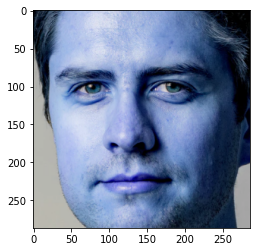

In [39]:
from matplotlib import pyplot as plt
import cv2

# Read the png file.
img = cv2.imread('test.png')

# Show the image.
plt.imshow(img)

print(f'Image size: {img.shape}')

In [42]:
# load image and turn it into a graph.
import cv2
import math

# Computes the difference between two pixels.
def pixel_difference(px1, px2):
    def fix_pixels(px):
        return [int(px[i]) for i in range(3)]
    px1_float = fix_pixels(px1)
    px2_float = fix_pixels(px2)
    diff = [abs(px1_float[i] - px2_float[i]) for i in range(3)]
    return max(diff)

def get_index_from_pixel(i, j, height, width):
    assert 0 <= i < width
    assert 0 <= j < height
    return j * width + i

def get_coordinates_from_index(s, height, width):
    assert 0 <= s < height * width
    j = s // width
    i = s % width
    return (i, j)

def connect_neighbouring_pixels(i, j, i1, j1, img, g):
    (height, width, _) = img.shape
    s = get_index_from_pixel(i, j, height, width)
    px = img[j, i]
    s1 = get_index_from_pixel(i1, j1, height, width)
    px1 = img[j1, i1]
    w = pixel_difference(px1, px)
    g.add_edge(s, s1, w)
    
def load_image_and_make_graph(img_file):
    img = cv2.imread(img_file)
    (height, width, _) = img.shape
    g = UndirectedGraph(height * width)
    for j in range(height):
        for i in range(width):
            s = get_index_from_pixel(i, j, height, width)
            g.set_vertex_data(s, (i, j))
            if i > 0:
                connect_neighbouring_pixels(i, j, i - 1, j, img, g)
            if i < width - 1:
                connect_neighbouring_pixels(i, j, i + 1, j, img, g)
            if j > 0:
                connect_neighbouring_pixels(i, j, i, j - 1, img, g)
            if j < height - 1:
                connect_neighbouring_pixels(i, j, i, j + 1, img, g)
    return g

In [43]:
print('Loading image and building graph.')
g = load_image_and_make_graph('test.png')
print('Running MST algorithm')
(mst_edges, mst_weight) = compute_mst(g)
print(f'Found MST witn {len(mst_edges)} edges and total weight = {mst_weight}')
max_mst_edge_weight= max(mst_edges, key=lambda e: e[2])
print(f'Largest MST edge weight = {max_mst_edge_weight[2]}')

Loading image and building graph.
Running MST algorithm
Found MST witn 82081 edges and total weight = 296093
Largest MST edge weight = 63


In [81]:
import numpy as np

def visualize_components(orig_img, g, components_dict):
    (w, h, channels) = orig_img.shape
    new_img = np.zeros((w, h, channels), np.uint8)
    count = 0
    delta = 10
    for (key, vert_set) in components_dict.items():
        if len(vert_set) >= 10:
            (i, j) = g.get_vertex_data(key)
            rgb_px = orig_img[j, i]
            rgb_colour = [int(rgb_px[i]) for i in range(3)]
            count += 1
            for s in vert_set:
                (i,j) = g.get_vertex_data(s)
                cv2.circle(new_img, (i,j), 1, rgb_colour, -1)
    return new_img

Found 73416 components
Showing components with at least 10 vertices


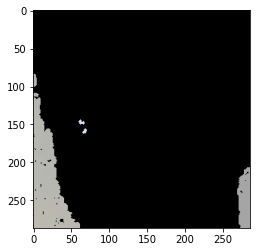

In [82]:
W0 = 0.01* max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 59003 components
Showing components with at least 10 vertices


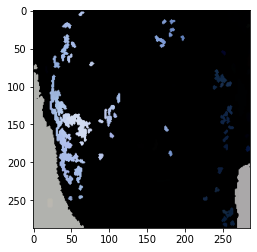

In [83]:
W0 = 0.02* max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img)

Found 59003 components
Showing components with at least 10 vertices


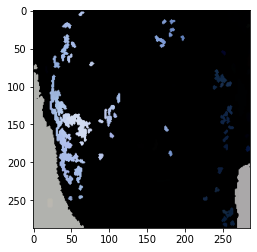

In [84]:
W0 = 0.03* max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
new_img= visualize_components(img, g, res)
print('Showing components with at least 10 vertices')
plt.imshow(new_img) # show the image on the screen

Found 42904 components
Showing components with at least 10 vertices


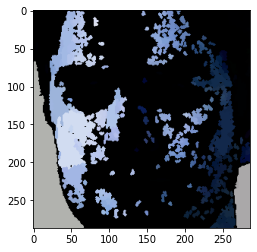

In [85]:
W0 = 0.04* max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 30374 components
Showing components with at least 10 vertices


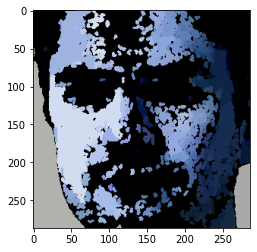

In [86]:
W0 = 0.05* max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 30374 components
Showing components with at least 10 vertices


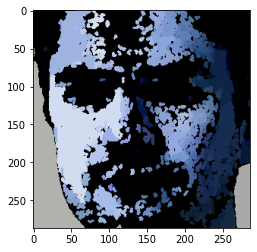

In [87]:
W0 = 0.06 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 21369 components
Showing components with at least 10 vertices


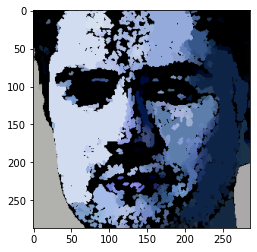

In [88]:
W0 = 0.07 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 15237 components
Showing components with at least 10 vertices


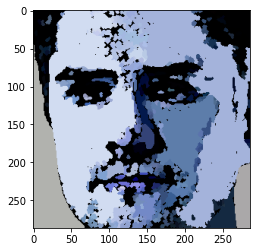

In [89]:
W0 = 0.08 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 15237 components
Showing components with at least 10 vertices


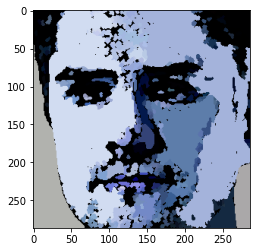

In [90]:
W0 = 0.09 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 11158 components
Showing components with at least 10 vertices


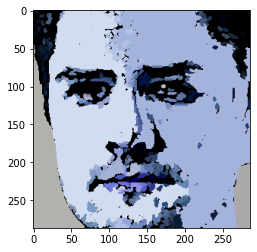

In [91]:
W0 = 0.1 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 5068 components
Showing components with at least 10 vertices


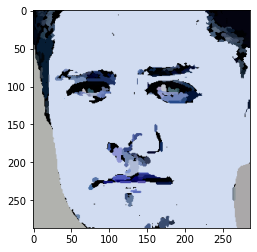

In [92]:
W0 = 0.15 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen

Found 3970 components
Showing components with at least 10 vertices


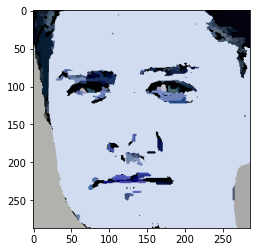

In [93]:
W0 = 0.17 * max_mst_edge_weight[2]
res = compute_scc(g, W0)
print(f'Found {len(res)} components')
print('Showing components with at least 10 vertices')
new_img= visualize_components(img, g, res)
plt.imshow(new_img) # show the image on the screen